### 목적 : clustering 관련 모듈 기본

In [1]:
import matplotlib, matplotlib.pyplot as plt
import pandas as pd
import sklearn.cluster, sklearn.preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
jeju = pd.read_csv('credit_card.csv', encoding='cp949')
jeju

,시도,시군구,읍면동,업종,연령대,성별,날짜,이용자수,이용횟수,이용액
0,제주도,제주시,읍면,유흥,60대이상,여,201812,16,21,4474000
1,제주도,제주시,읍면,유흥,60대이상,남,201812,45,59,8459100
2,제주도,제주시,읍면,유흥,50대,여,201812,38,47,4403500
3,제주도,제주시,읍면,유흥,50대,남,201812,136,174,23659532
4,제주도,제주시,읍면,유흥,40대,여,201812,60,74,5511100
...,...,...,...,...,...,...,...,...,...,...
9802,제주도,서귀포시,도심,교통,40대,남,201609,1778,2059,79696179
9803,제주도,서귀포시,도심,교통,30대,여,201609,1441,1543,52066479
9804,제주도,서귀포시,도심,교통,30대,남,201609,2358,2606,87972936
9805,제주도,서귀포시,도심,교통,20대,여,201609,731,765,22788256


In [3]:
data = jeju.copy()
data

,시도,시군구,읍면동,업종,연령대,성별,날짜,이용자수,이용횟수,이용액
0,제주도,제주시,읍면,유흥,60대이상,여,201812,16,21,4474000
1,제주도,제주시,읍면,유흥,60대이상,남,201812,45,59,8459100
2,제주도,제주시,읍면,유흥,50대,여,201812,38,47,4403500
3,제주도,제주시,읍면,유흥,50대,남,201812,136,174,23659532
4,제주도,제주시,읍면,유흥,40대,여,201812,60,74,5511100
...,...,...,...,...,...,...,...,...,...,...
9802,제주도,서귀포시,도심,교통,40대,남,201609,1778,2059,79696179
9803,제주도,서귀포시,도심,교통,30대,여,201609,1441,1543,52066479
9804,제주도,서귀포시,도심,교통,30대,남,201609,2358,2606,87972936
9805,제주도,서귀포시,도심,교통,20대,여,201609,731,765,22788256


In [4]:
data = pd.get_dummies(data=data, columns=['시도'], prefix=['시도'])
data = pd.get_dummies(data=data, columns=['시군구'], prefix=['시군구'])
data = pd.get_dummies(data=data, columns=['읍면동'], prefix=['읍면동'])
data = pd.get_dummies(data=data, columns=['업종'], prefix=['업종'])
data = pd.get_dummies(data=data, columns=['연령대'], prefix=['연령대'])
data = pd.get_dummies(data=data, columns=['성별'], prefix=['성별'])

In [5]:
data

,날짜,이용자수,이용횟수,이용액,시도_제주도,시군구_서귀포시,시군구_제주시,읍면동_도심,읍면동_읍면,업종_교통,...,업종_유흥,연령대_20 미만,연령대_20대,연령대_20대미만,연령대_30대,연령대_40대,연령대_50대,연령대_60대이상,성별_남,성별_여
0,201812,16,21,4474000,1,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,1
1,201812,45,59,8459100,1,0,1,0,1,0,...,1,0,0,0,0,0,0,1,1,0
2,201812,38,47,4403500,1,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,1
3,201812,136,174,23659532,1,0,1,0,1,0,...,1,0,0,0,0,0,1,0,1,0
4,201812,60,74,5511100,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9802,201609,1778,2059,79696179,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
9803,201609,1441,1543,52066479,1,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
9804,201609,2358,2606,87972936,1,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
9805,201609,731,765,22788256,1,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1


In [6]:
data.columns

Index(['날짜', '이용자수', '이용횟수', '이용액', '시도_제주도', '시군구_서귀포시', '시군구_제주시', '읍면동_도심',
       '읍면동_읍면', '업종_교통', '업종_기타', '업종_문화/레져', '업종_소매', '업종_쇼핑', '업종_숙박',
       '업종_식음료', '업종_유흥', '연령대_20 미만', '연령대_20대', '연령대_20대미만', '연령대_30대',
       '연령대_40대', '연령대_50대', '연령대_60대이상', '성별_남', '성별_여'],
      dtype='object')

클러스터링 객체를 생성하고 모델을 학습시킴  
n_clusters 인자 수만큼 임의로 데이터를 군집화

In [7]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [8]:
columns = ['시군구_제주시', '읍면동_도심', '읍면동_읍면',
       '업종_교통', '업종_문화/레져', '업종_소매', '업종_쇼핑', '업종_숙박', '업종_식음료', '업종_유흥',
       '연령대_20대', '연령대_20대미만', '연령대_30대', '연령대_40대', '연령대_50대', '연령대_60대이상',
       '성별_남', '성별_여']
max_score = 0
optimized_n = 0

for k in range(415, 435):
    km = KMeans(n_clusters=k, random_state=77).fit(data[columns])
    
    # silhouette_score N 개로 클러스터링했을 때 중심점을 기준으로 얼마나 잘 뭉쳐있는
    # 정도를 나타내는 수치
    s_score = silhouette_score(data[columns], km.labels_)
    
    if s_score > max_score:
        max_score = s_score
        optimized_n = k
        
    print("score for %d clusters:%.3f" % (k, s_score))
    
print(f'\n 최적의 클러스터개수: {optimized_n}, silhouette 점수: {max_score}')

score for 415 clusters:0.987
score for 416 clusters:0.988
score for 417 clusters:0.990
score for 418 clusters:0.991
score for 419 clusters:0.992
score for 420 clusters:0.993
score for 421 clusters:0.994
score for 422 clusters:0.995
score for 423 clusters:0.996
score for 424 clusters:0.997
score for 425 clusters:0.998
score for 426 clusters:0.998
score for 427 clusters:0.999
score for 428 clusters:0.999
score for 429 clusters:0.999
score for 430 clusters:1.000
score for 431 clusters:1.000
score for 432 clusters:1.000
score for 433 clusters:1.000
score for 434 clusters:1.000

 최적의 클러스터개수: 431, silhouette 점수: 0.9998980320179464


In [9]:
kmeans = sklearn.cluster.KMeans(n_clusters=430, random_state=42)
kmeans.fit(data[columns])
data['Clusters'] = kmeans.labels_
data

,날짜,이용자수,이용횟수,이용액,시도_제주도,시군구_서귀포시,시군구_제주시,읍면동_도심,읍면동_읍면,업종_교통,...,연령대_20 미만,연령대_20대,연령대_20대미만,연령대_30대,연령대_40대,연령대_50대,연령대_60대이상,성별_남,성별_여,Clusters
0,201812,16,21,4474000,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,29
1,201812,45,59,8459100,1,0,1,0,1,0,...,0,0,0,0,0,0,1,1,0,317
2,201812,38,47,4403500,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,55
3,201812,136,174,23659532,1,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,289
4,201812,60,74,5511100,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9802,201609,1778,2059,79696179,1,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,163
9803,201609,1441,1543,52066479,1,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,278
9804,201609,2358,2606,87972936,1,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,316
9805,201609,731,765,22788256,1,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,129


### Label이 없는 데이터에 대한 해석

In [10]:
colums_list = ['시도_제주도', '시군구_제주시', '읍면동_도심', '읍면동_읍면',
       '업종_교통', '업종_문화/레져', '업종_소매', '업종_쇼핑', '업종_숙박', '업종_식음료', '업종_유흥',
       '연령대_20대', '연령대_20대미만', '연령대_30대', '연령대_40대', '연령대_50대', '연령대_60대이상',
       '성별_남', '성별_여']
feature = data[colums_list]
feature

,시도_제주도,시군구_제주시,읍면동_도심,읍면동_읍면,업종_교통,업종_문화/레져,업종_소매,업종_쇼핑,업종_숙박,업종_식음료,업종_유흥,연령대_20대,연령대_20대미만,연령대_30대,연령대_40대,연령대_50대,연령대_60대이상,성별_남,성별_여
0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
2,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9802,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9803,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
9804,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
9805,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [11]:
import numpy as np

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
ss = StandardScaler()
ss.fit(feature)
feature_s = ss.transform(feature)

In [14]:
km = KMeans(n_clusters=430).fit(feature_s)

In [15]:
target = data['Clusters']

In [16]:
feature_s[:5]

array([[ 0.        ,  0.99359652, -1.00132646,  1.00132646, -0.38552517,
        -0.39644437, -0.39816472, -0.39850839, -0.38831199, -0.39850839,
         2.68197361, -0.45596861, -0.27553369, -0.45596861, -0.45596861,
        -0.45596861,  2.19391841, -1.00153069,  1.00153069],
       [ 0.        ,  0.99359652, -1.00132646,  1.00132646, -0.38552517,
        -0.39644437, -0.39816472, -0.39850839, -0.38831199, -0.39850839,
         2.68197361, -0.45596861, -0.27553369, -0.45596861, -0.45596861,
        -0.45596861,  2.19391841,  0.99847165, -0.99847165],
       [ 0.        ,  0.99359652, -1.00132646,  1.00132646, -0.38552517,
        -0.39644437, -0.39816472, -0.39850839, -0.38831199, -0.39850839,
         2.68197361, -0.45596861, -0.27553369, -0.45596861, -0.45596861,
         2.1931334 , -0.45580546, -1.00153069,  1.00153069],
       [ 0.        ,  0.99359652, -1.00132646,  1.00132646, -0.38552517,
        -0.39644437, -0.39816472, -0.39850839, -0.38831199, -0.39850839,
         2.681

In [17]:
target.unique()

array([ 29, 317,  55, 289, 174,  78, 286, 213, 341, 314, 203, 182, 265,
       188, 243, 172, 271, 168, 184,  21, 388, 382, 231, 177, 164, 281,
        31, 299, 136,   9, 269, 161, 165, 146,  68,  63, 208, 224,  10,
       312, 179, 181, 268, 260, 414, 394, 326,  59,  69,  23, 157, 142,
       209,  64, 263, 249, 106, 391, 306, 237, 124, 275,  66, 133, 233,
       325, 300, 251, 389, 397,   0, 248,  82, 187, 217, 221, 332, 151,
       145, 186, 390, 320, 290,  27, 328,  52, 131, 104, 322,  76, 277,
        91, 148, 160,  57, 292,   2,  13, 267, 109, 147, 257, 112, 323,
       395, 393,  94, 185, 118,  81, 215, 100, 173, 207, 235, 211,  36,
       340,  61, 298,  84,  85, 236, 134, 309,  26,  51, 119, 139, 117,
       318,  17, 202, 280, 226, 204, 239, 313, 116, 167, 333, 409,  25,
       170, 302, 272, 311, 222, 180, 308,  20, 196, 383, 319, 293, 266,
       200, 153, 198,  16, 241, 252,  58, 183, 385, 384, 144, 125, 128,
        74, 307,  98, 282, 229,  95, 159, 422, 230,  50,  18, 19

In [18]:
train_input, test_input, train_target, test_target = train_test_split(
    feature_s, target, test_size=0.3, random_state=42)

In [19]:
import numpy as np
from lightgbm import LGBMClassifier

In [20]:
train_input[:3]

array([[ 0.        , -1.00644475,  0.99867529, -0.99867529, -0.38552517,
        -0.39644437, -0.39816472,  2.50935749, -0.38831199, -0.39850839,
        -0.37285975, -0.45596861, -0.27553369, -0.45596861, -0.45596861,
        -0.45596861, -0.45580546,  0.99847165, -0.99847165],
       [ 0.        , -1.00644475,  0.99867529, -0.99867529, -0.38552517,
        -0.39644437, -0.39816472, -0.39850839,  2.57524885, -0.39850839,
        -0.37285975, -0.45596861, -0.27553369, -0.45596861, -0.45596861,
        -0.45596861, -0.45580546, -1.00153069,  1.00153069],
       [ 0.        , -1.00644475,  0.99867529, -0.99867529, -0.38552517,
        -0.39644437, -0.39816472, -0.39850839, -0.38831199,  2.50935749,
        -0.37285975, -0.45596861, -0.27553369, -0.45596861, -0.45596861,
         2.1931334 , -0.45580546,  0.99847165, -0.99847165]])

In [21]:
train_target.unique()

array([348, 426, 294, 242, 269,  38, 111, 122, 359, 232, 118,  31, 180,
       149, 365, 383, 334, 140, 190, 102, 231,  20, 247,  94,  75, 379,
       114, 275, 356, 369, 228,   9,  60, 352, 297, 403,  80, 422,  55,
       107, 263,  61,  79, 252, 211, 368, 411,  22,  91, 332, 223, 212,
       243,  28,  65, 163,  78, 293, 233,  57,  90, 236, 157, 306, 184,
       339,  21, 131, 367, 196,  85, 240, 164, 248, 317, 125, 187, 267,
       386, 182, 205, 165, 204, 238, 388, 106, 296, 264, 132,  68, 256,
       239,   3, 141, 381, 147, 206, 186,  13, 371, 257,  29, 392, 203,
       343, 202,  48, 276, 151, 312, 166,  69, 421, 279,  96, 326, 325,
       377, 255, 298, 271, 378, 130,  26, 172, 346, 105, 249, 277, 416,
       254, 246,  25, 133,  41, 193,  88,  97, 322, 313,  45, 124,  64,
         1,  71,  18,  87, 407, 195, 198,  56, 176,  95, 315,  82, 290,
       336, 323, 129,  98, 108,  49, 222, 199, 181, 258, 224, 295, 215,
       384,  67, 347, 272, 227, 208,  50, 311, 153, 300,  23, 33

In [22]:
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.0807129205534369 0.08099456617523712


In [23]:
train_input

array([[ 0.        , -1.00644475,  0.99867529, ..., -0.45580546,
         0.99847165, -0.99847165],
       [ 0.        , -1.00644475,  0.99867529, ..., -0.45580546,
        -1.00153069,  1.00153069],
       [ 0.        , -1.00644475,  0.99867529, ..., -0.45580546,
         0.99847165, -0.99847165],
       ...,
       [ 0.        , -1.00644475,  0.99867529, ..., -0.45580546,
         0.99847165, -0.99847165],
       [ 0.        , -1.00644475, -1.00132646, ...,  2.19391841,
         0.99847165, -0.99847165],
       [ 0.        , -1.00644475,  0.99867529, ..., -0.45580546,
        -1.00153069,  1.00153069]])

In [24]:
import lightgbm as lgb

In [25]:
clf = lgb.LGBMClassifier()
clf.fit(train_input, train_target)

LGBMClassifier()

In [26]:
y_pred = clf.predict(test_input)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy = accuracy_score(y_pred, test_target)

In [29]:
print(accuracy_score(test_target, y_pred))

0.03126061841658172


In [30]:
test_target[:20]

3742    221
4317    121
1568    401
764       2
3349    168
9386      1
9504    233
3269    399
2157    153
7120    193
3689    231
6203    208
7735     91
1188    398
3344    265
1543    120
360      31
5528     46
96        2
4974    108
Name: Clusters, dtype: int32

In [31]:
y_pred[:20]

array([270,  61,  65, 201, 185, 161, 322, 144, 155, 400,  83,  12,  52,
       400,  83,  12, 287, 155, 201, 158])

In [32]:
print(clf.score(train_input, train_target))

0.036567599067599064


In [33]:
print(clf.score(test_input, test_target))

0.03126061841658172


In [34]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9997086671522215


In [35]:
rf.fit(train_input, train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [36]:
y_pred = rf.predict(test_input)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy = accuracy_score(y_pred, test_target)

In [39]:
print(accuracy_score(test_target, y_pred))

1.0


In [40]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.         0.23923061 0.07026226 0.0667904  0.03886959 0.03954644
 0.03922991 0.05104487 0.03798405 0.04815004 0.03187203 0.02425545
 0.04499674 0.03317537 0.03030081 0.03216284 0.03213431 0.06963958
 0.07035469]


In [48]:
max(rf.feature_importances_)

0.23923060782944477

In [41]:
feature.columns

Index(['시도_제주도', '시군구_제주시', '읍면동_도심', '읍면동_읍면', '업종_교통', '업종_문화/레져', '업종_소매',
       '업종_쇼핑', '업종_숙박', '업종_식음료', '업종_유흥', '연령대_20대', '연령대_20대미만', '연령대_30대',
       '연령대_40대', '연령대_50대', '연령대_60대이상', '성별_남', '성별_여'],
      dtype='object')

Text(0.5, 1.0, '제주도 신용카드 사용내역')

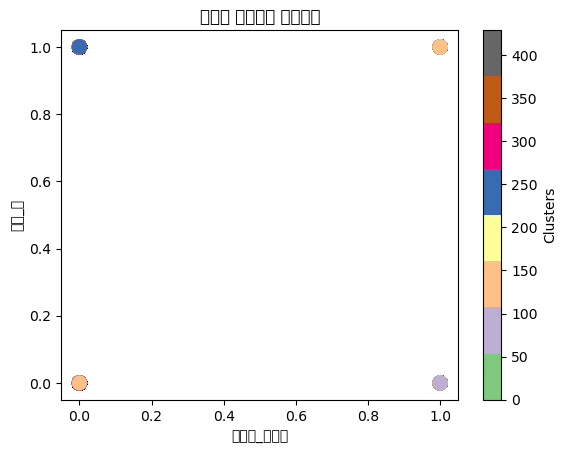

In [50]:
columns = ['날짜', '이용자수', '이용횟수', '이용액', '시도_제주도', '시군구_제주시', '읍면동_도심', '읍면동_읍면',
       '업종_교통', '업종_문화/레져', '업종_소매', '업종_쇼핑', '업종_숙박', '업종_식음료', '업종_유흥',
       '연령대_20대', '연령대_20대미만', '연령대_30대', '연령대_40대', '연령대_50대', '연령대_60대이상',
       '성별_남', '성별_여']
# # 클러스터링 객체를 생성하고 모델을 학습시킨다.
# kmeans = sklearn.cluster.KMeans(n_clusters=5, random_state = 77)
# kmeans.fit(alco2009[columns])
# data["Clusters"] = kmeans.labels_
# centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns)

# # 플로팅 스타일을 선택한다.
# matplotlib.style.use("ggplot")

# 주와 centroid를 플롯에 그린다.
ax = data.plot.scatter(columns[5], columns[21], c="Clusters", 
                           cmap=plt.cm.Accent, s=100)
#data.plot.scatter(columns[2], columns[1], color="red", marker="+", 
#                     s=200, ax=ax)

# 플롯에 제목을 붙이고 저장한다.
plt.title("제주도 신용카드 사용내역")

In [43]:
feature

,시도_제주도,시군구_제주시,읍면동_도심,읍면동_읍면,업종_교통,업종_문화/레져,업종_소매,업종_쇼핑,업종_숙박,업종_식음료,업종_유흥,연령대_20대,연령대_20대미만,연령대_30대,연령대_40대,연령대_50대,연령대_60대이상,성별_남,성별_여
0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
2,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9802,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9803,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
9804,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
9805,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [44]:
from sklearn.decomposition import PCA
X = feature.copy()

#객체
pca = PCA(n_components=2)

#적용
pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[-0.99303673,  0.02874039],
       [-0.01597397, -0.99367235],
       [-0.99332671,  0.02856353],
       ...,
       [ 0.99403509, -0.02581362],
       [ 0.01693806,  0.99695228],
       [ 0.99400082, -0.02546047]])

In [45]:
#x_pca를 보기 쉽게 데이터프레임으로 만들기
pca_df = pd.DataFrame(x_pca)
pca_df['Clusters'] = data['Clusters'] 
pca_df.head()

,0,1,Clusters
0,-0.993037,0.028740,29
1,-0.015974,-0.993672,317
2,-0.993327,0.028564,55
3,-0.016264,-0.993849,289
4,-0.993354,0.028817,174


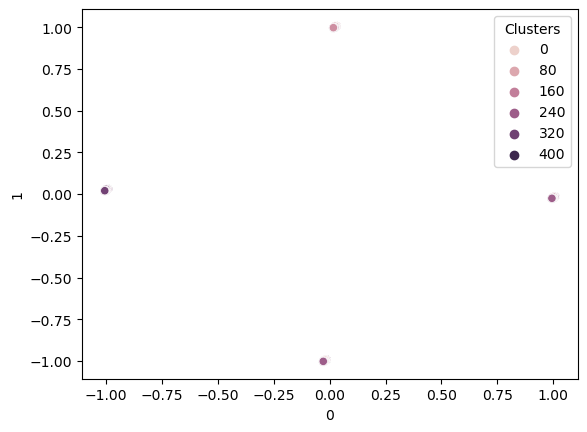

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
axs = plt.subplots()
axs = sns.scatterplot(0, 1, hue='Clusters', data=pca_df)